# 1. 환경설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get -qq -y install fonts-nanum > /dev/null

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
mpl.rc('font', family='NanumSquareRound') 
fm._rebuild()

In [ ]:
%cd '/content/gdrive/MyDrive/sbs/핵심역량프로젝트/재은/D'
!ls

/content/gdrive/.shortcut-targets-by-id/13UT7pZKq5f5I3_As8dIyogN3Up9BH8R9/00_sbs/핵심역량프로젝트/재은/D
지역간거리두기.csv.  체지방률-회귀.ipynb	 teen4.csv
청소년d.ipynb	     OWID_KOREA_COVID데이터.csv


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/sbs/핵심역량프로젝트/재은/D/teen4.csv')

In [ ]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# 2. 데이터 탐색

In [ ]:
data

,Datetime,년,월,일,요일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력
0,2018-01-02,2018,1,2,Tuesday,1,15.00,0,179.60,64.50,14.70,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50
1,2018-01-02,2018,1,2,Tuesday,1,17.00,0,173.50,88.30,31.10,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40
2,2018-01-02,2018,1,2,Tuesday,1,17.00,0,176.30,74.98,16.90,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40
3,2018-01-02,2018,1,2,Tuesday,1,18.00,0,167.70,82.90,35.80,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20
4,2018-01-02,2018,1,2,Tuesday,1,15.00,0,175.70,69.20,23.70,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303108,2022-05-30,2022,5,30,Monday,2,18.00,0,177.70,70.90,20.20,77.00,142.00,22.50,6.30,17.46,0.54,48.30,60.98,55.10
303109,2022-05-30,2022,5,30,Monday,1,18.00,1,165.50,60.80,29.80,71.00,109.00,22.20,31.50,19.21,0.51,75.29,23.00,46.70
303110,2022-05-30,2022,5,30,Monday,2,16.00,1,167.60,61.50,22.70,62.00,139.00,21.90,13.70,19.86,0.50,55.48,32.00,63.60
303111,2022-05-30,2022,5,30,Monday,1,16.00,1,152.80,49.70,30.60,72.00,123.00,21.30,15.30,21.14,0.45,43.99,31.00,50.70


In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.describe()

,년,월,일,회차,나이,성별,신장,체중,체지방률,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력
count,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00,303113.00
mean,2019.34,6.19,15.77,1.59,15.48,0.44,166.15,62.56,25.33,75.13,119.95,22.52,10.20,21.26,0.49,53.10,38.50,51.50
std,1.45,2.54,8.35,0.99,1.65,0.50,8.46,14.26,9.33,8.10,10.08,4.15,10.05,3.06,0.09,8.31,20.28,12.41
min,2018.00,1.00,1.00,1.00,13.00,0.00,140.00,25.00,5.00,50.00,80.00,10.60,-41.00,10.10,0.00,20.22,1.00,0.00
25%,2018.00,4.00,9.00,1.00,14.00,0.00,159.90,52.20,17.60,70.00,114.00,19.50,4.00,19.00,0.43,47.34,21.00,42.50
50%,2019.00,5.00,16.00,1.00,16.00,0.00,166.00,60.10,25.60,76.00,120.00,21.80,10.80,20.87,0.49,52.35,35.00,50.50
75%,2021.00,8.00,23.00,2.00,17.00,1.00,172.40,70.60,32.50,80.00,125.00,24.80,17.30,23.06,0.55,58.18,55.00,59.70
max,2022.00,12.00,31.00,12.00,18.00,1.00,201.20,120.00,50.00,100.00,160.00,45.20,49.00,78.10,2.00,99.98,130.00,100.00


In [ ]:
mpl.rc('axes', unicode_minus=False)

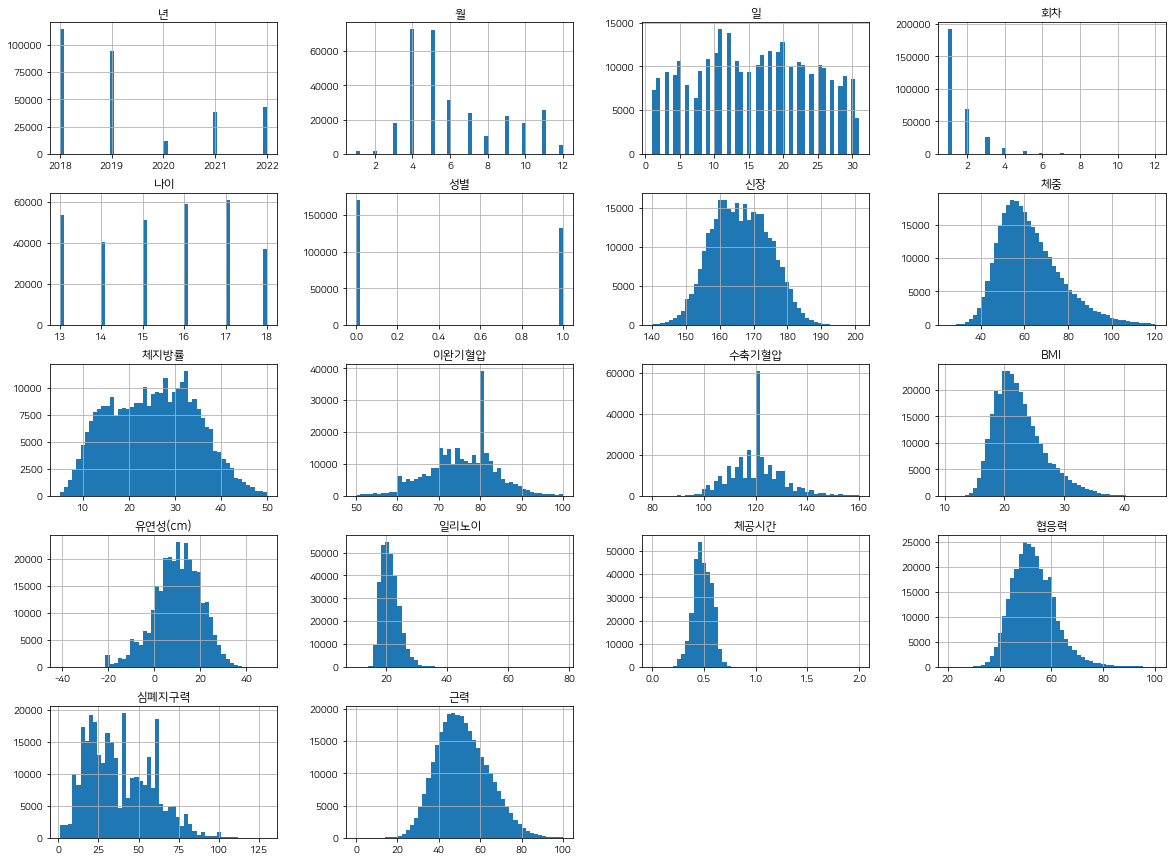

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
corr = data.corr()

In [ ]:
corr['심폐지구력'].sort_values(ascending=False)

심폐지구력      1.00
체공시간       0.52
근력         0.50
신장         0.34
나이         0.06
유연성(cm)    0.04
수축기혈압      0.03
년          0.03
회차         0.00
일         -0.01
이완기혈압     -0.01
월         -0.01
체중        -0.02
BMI       -0.20
협응력       -0.26
성별        -0.47
일리노이      -0.53
체지방률      -0.58
Name: 심폐지구력, dtype: float64

In [ ]:
corr['근력'].sort_values(ascending=False)

근력         1.00
체공시간       0.57
심폐지구력      0.50
신장         0.33
나이         0.14
회차         0.07
월          0.05
유연성(cm)    0.04
수축기혈압      0.01
년          0.01
일          0.01
이완기혈압     -0.03
체중        -0.17
협응력       -0.29
BMI       -0.38
성별        -0.47
일리노이      -0.49
체지방률      -0.73
Name: 근력, dtype: float64

In [ ]:
corr['체지방률'].sort_values(ascending=False)

체지방률       1.00
BMI        0.59
성별         0.56
일리노이       0.51
체중         0.31
협응력        0.21
이완기혈압      0.08
유연성(cm)    0.07
수축기혈압      0.05
년          0.03
나이         0.02
회차         0.00
일         -0.01
월         -0.03
신장        -0.38
심폐지구력     -0.58
체공시간      -0.59
근력        -0.73
Name: 체지방률, dtype: float64

# 4. 데이터 준비

In [ ]:
data.columns

Index(['Datetime', '년', '월', '일', '요일', '회차', '나이', '성별', '신장', '체중', '체지방률',
       '이완기혈압', '수축기혈압', 'BMI', '유연성(cm)', '일리노이', '체공시간', '협응력', '심폐지구력',
       '근력'],
      dtype='object')

In [ ]:
X = data.drop(['Datetime', '년', '월', '일', '요일', '회차', '체지방률'], axis=1)
y = data['체지방률']

In [ ]:
X

,나이,성별,신장,체중,이완기혈압,수축기혈압,BMI,유연성(cm),일리노이,체공시간,협응력,심폐지구력,근력
0,15.00,0,179.60,64.50,53.00,106.00,20.00,6.00,19.22,0.51,52.38,40.00,50.50
1,17.00,0,173.50,88.30,74.00,130.00,29.30,2.00,21.26,0.39,72.28,20.00,45.40
2,17.00,0,176.30,74.98,85.00,153.00,24.10,14.60,17.46,0.60,48.35,33.00,57.40
3,18.00,0,167.70,82.90,86.00,127.00,29.50,16.80,25.56,0.38,51.00,18.00,35.20
4,15.00,0,175.70,69.20,93.00,135.00,22.40,5.00,19.04,0.51,50.93,44.00,42.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303108,18.00,0,177.70,70.90,77.00,142.00,22.50,6.30,17.46,0.54,48.30,60.98,55.10
303109,18.00,1,165.50,60.80,71.00,109.00,22.20,31.50,19.21,0.51,75.29,23.00,46.70
303110,16.00,1,167.60,61.50,62.00,139.00,21.90,13.70,19.86,0.50,55.48,32.00,63.60
303111,16.00,1,152.80,49.70,72.00,123.00,21.30,15.30,21.14,0.45,43.99,31.00,50.70


In [ ]:
y

0        14.70
1        31.10
2        16.90
3        35.80
4        23.70
          ... 
303108   20.20
303109   29.80
303110   22.70
303111   30.60
303112   14.00
Name: 체지방률, Length: 303113, dtype: float64

# 5. 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=10)

# 6. 데이터 변환

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
s_scaler = StandardScaler()
s_scaler.fit(train_X)
train_X = s_scaler.transform(train_X)
test_X = s_scaler.transform(test_X)

In [ ]:
'''
mm_scaler = MinMaxScaler()
mm_scaler.fit(train_X)
train_X = mm_scaler.transform(train_X)
test_X = mm_scaler.transform(test_X)
'''

'\nmm_scaler = MinMaxScaler()\nmm_scaler.fit(train_X)\ntrain_X = mm_scaler.transform(train_X)\ntest_X = mm_scaler.transform(test_X)\n'

# 7. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [ ]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)
print(lr_model.score(train_X, train_y))
print(lr_model.score(test_X, test_y))

0.8367357741870556
0.8361900014791813


In [ ]:
pred_y = lr_model.predict(test_X)

In [ ]:
print('평균제곱오차: %.2f' %mean_squared_error(pred_y, test_y))
print('결정계수: %.2f' % r2_score(pred_y, test_y))

평균제곱오차: 14.30
결정계수: 0.80


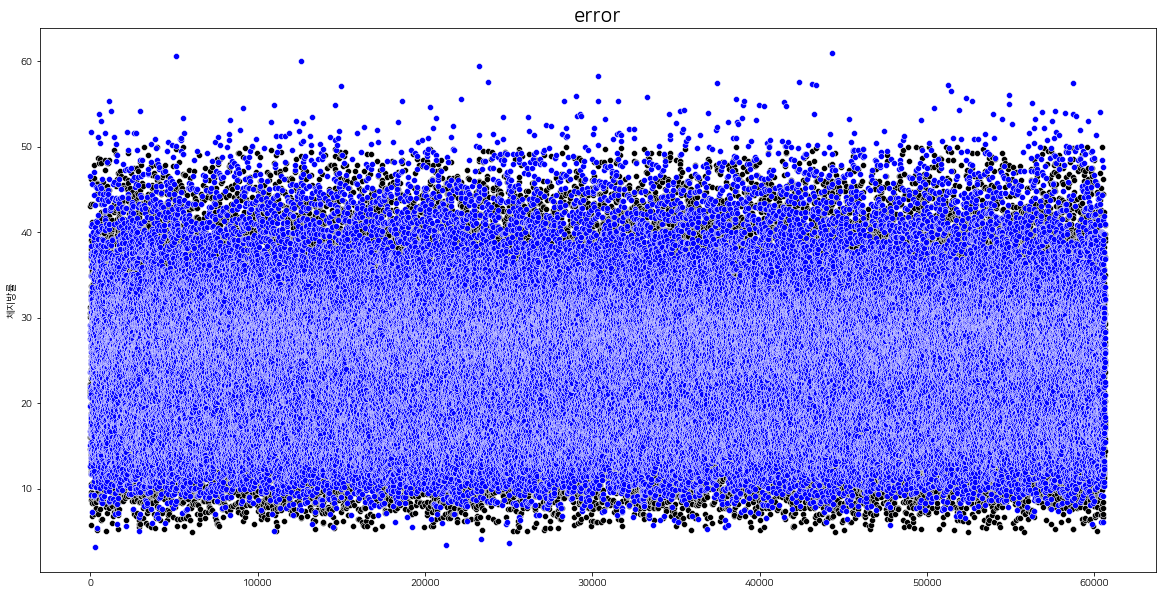

In [ ]:
plt.figure(figsize=(20, 10))

sns.scatterplot(range(len(test_y)), test_y,  color='black')
sns.scatterplot(range(len(pred_y)), pred_y,  color='blue')

plt.title("error", fontsize=20)

plt.show()

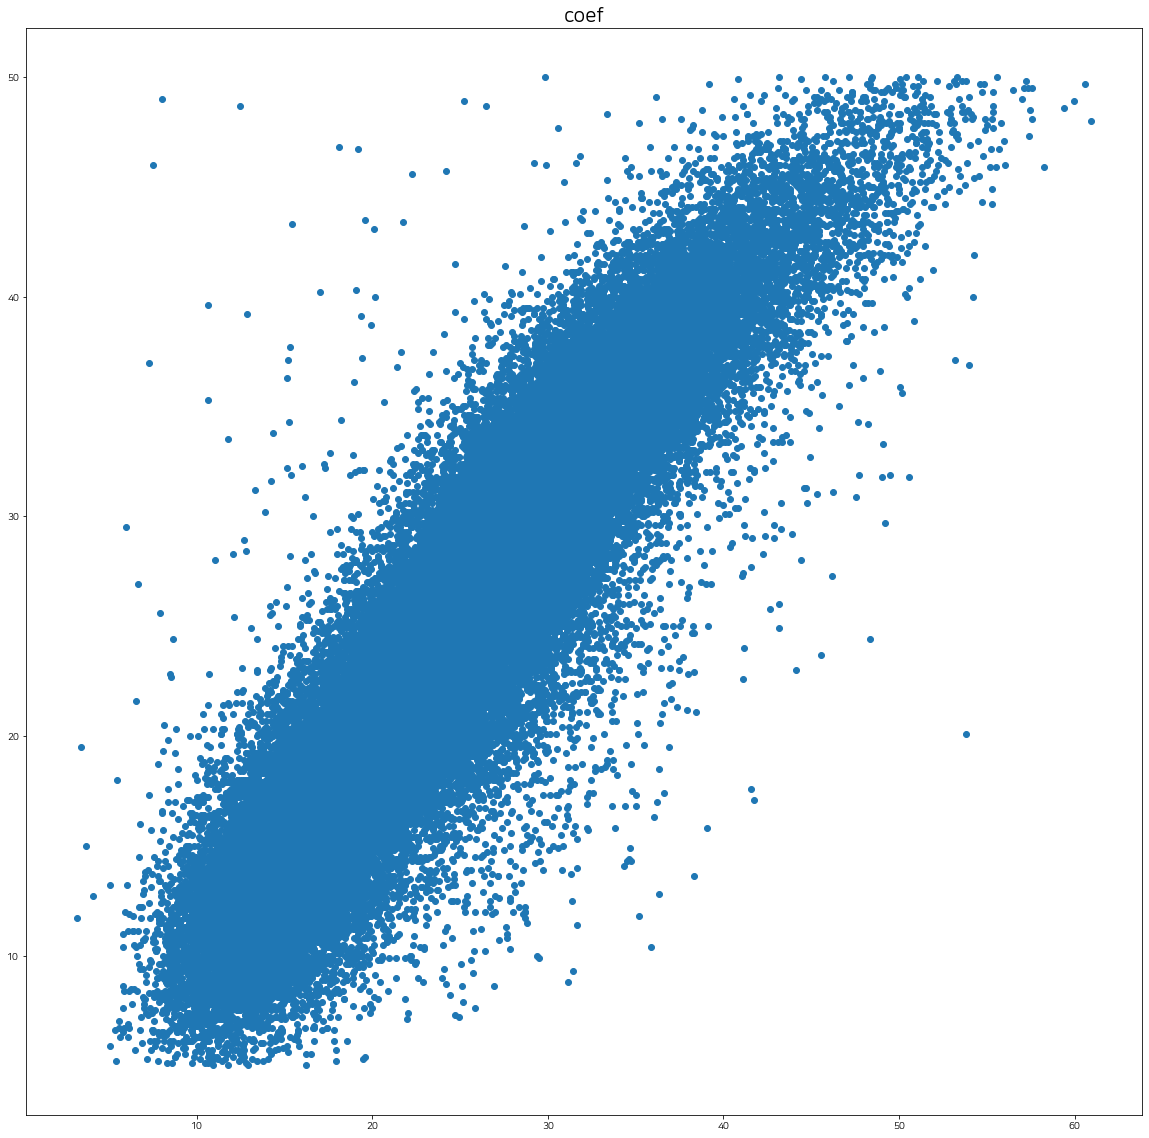

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(pred_y, test_y)
plt.title("coef", fontsize=20)
plt.show()

In [ ]:
lr_model = LinearRegression()
kfold = KFold(n_splits=5)
n_iter=0  # 교차검증횟수
score={}
score['accuracy']=[]
score['rmse']=[]
score['r2']=[]

In [ ]:
for train_idx, val_idx in kfold.split(train_X):
    X_train, X_val =  train_X[train_idx], train_X[val_idx]
    y_train, y_val =  train_y[train_idx], train_y[val_idx]
    
    lr_model.fit(X_train, y_train)
    pred = lr_model.predict(X_val)   
    accuracy = lr_model.score(y_val, pred)
    rmse = lr_model.mean_squared_error(y_val, pred)
    r2 = lr_model.r2_score(y_val, pred)
        
    train_size = X_train.shape[0]
    val_size = X_val.shape[0]
    
    print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data  크기 : {3}".format(n_iter, accuracy, train_size, val_size))
    print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data  크기 : {3}".format(n_iter, accuracy, train_size, val_size))
    print("Iter : {0} Cross-Validation Accuracy : {1}, Train Data 크기 : {2}, Validation Data  크기 : {3}".format(n_iter, accuracy, train_size, val_size))

    n_iter += 1

    score['accuracy'].append(accuracy)
    score['rmse'].append(rmse)
    score['r2'].append(r2)

print("\n> 평균 Accuracy 점수 : ", np.mean(score['accuracy']))
print("> 평균 MSE 점수 : ", np.mean(score['rmse']))
print("> 평균 R2 점수 : ", np.mean(score['r2']))

KeyError: ignored

# 8. Ridge, Lasso

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
ridge_model = Ridge()
ridge_model.fit(train_X, train_y)
print(ridge_model.score(train_X, train_y))
print(ridge_model.score(test_X, test_y))    

0.8367357720999622
0.8361901106183149


In [ ]:
pred_y = ridge_model.predict(test_X)

In [ ]:
print('평균제곱오차: %.2f' %mean_squared_error(pred_y, test_y))
print('결정계수: %.2f' % r2_score(pred_y, test_y))

평균제곱오차: 14.30
결정계수: 0.80


In [ ]:
lasso_model = Lasso()
lasso_model.fit(train_X, train_y)
print(lasso_model.score(train_X, train_y))
print(lasso_model.score(test_X, test_y))    

0.8012465617865805
0.8009317600664176


In [ ]:
pred_y = lasso_model.predict(test_X)

In [ ]:
print('평균제곱오차: %.2f' %mean_squared_error(pred_y, test_y))
print('결정계수: %.2f' % r2_score(pred_y, test_y))

평균제곱오차: 17.38
결정계수: 0.64


# 9. ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
en_model = ElasticNet(alpha=0.001, l1_ratio=0.001)
en_model.fit(train_X, train_y)
print(en_model.score(train_X, train_y))
print(en_model.score(test_X, test_y))

0.836657923185255
0.8361304711013526


In [ ]:
pred_y = en_model.predict(test_X)

In [ ]:
print('평균제곱오차: %.2f' %mean_squared_error(pred_y, test_y))
print('결정계수: %.2f' % r2_score(pred_y, test_y))

평균제곱오차: 14.31
결정계수: 0.80


# 10. SGD

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_model = SGDRegressor()
sgd_model.fit(train_X, train_y)
print(sgd_model.score(train_X, train_y))
print(sgd_model.score(test_X, test_y))

0.8363402641350769
0.8356500201445313


In [ ]:
pred_y = sgd_model.predict(test_X)

In [ ]:
print('평균제곱오차: %.2f' %mean_squared_error(pred_y, test_y))
print('결정계수: %.2f' % r2_score(pred_y, test_y))

평균제곱오차: 14.35
결정계수: 0.81


# 11. 스코어링

In [ ]:
from sklearn.utils import all_estimators

In [ ]:
reg_class = all_estimators(type_filter="regressor")
num = 0

for (model_name, model_class) in reg_class:
  try:  
    model_ins = model_class()         
  except:
    pass

  model_ins.fit(train_X, train_y)   
  pred_y = model_ins.predict(test_X)  

  print(f'[{num:2d}] {model_name:30s} r2 점수 = {r2_score(test_y, pred_y):.2f}, mse 점수 = {mean_squared_error(test_y, pred_y):.2f}')

  num = num + 1

[ 0] ARDRegression                  r2 점수 = 0.84, mse 점수 = 14.30
[ 1] AdaBoostRegressor              r2 점수 = 0.58, mse 점수 = 36.62
[ 2] BaggingRegressor               r2 점수 = 0.84, mse 점수 = 14.28
[ 3] BayesianRidge                  r2 점수 = 0.84, mse 점수 = 14.30
[ 4] CCA                            r2 점수 = 0.83, mse 점수 = 14.65
[ 5] DecisionTreeRegressor          r2 점수 = 0.69, mse 점수 = 26.79
[ 6] DummyRegressor                 r2 점수 = -0.00, mse 점수 = 87.31
[ 7] ElasticNet                     r2 점수 = 0.77, mse 점수 = 20.02
[ 8] ElasticNetCV                   r2 점수 = 0.84, mse 점수 = 14.36
[ 9] ExtraTreeRegressor             r2 점수 = 0.69, mse 점수 = 27.19
[10] ExtraTreesRegressor            r2 점수 = 0.85, mse 점수 = 12.81
[11] GammaRegressor                 r2 점수 = 0.75, mse 점수 = 22.00


# 회귀

In [ ]:
from sklearn.linear_model import ARDRegression, BayesianRidge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
def regressor(X_df, y_df):
    import ast

    linear = LinearRegression()
    ridge = Ridge()
    lasso = Lasso()
    elastic = ElasticNet()
    ardr = ARDRegression()
    baysian = BayesianRidge()
    randomforest = RandomForestRegressor()
    xgboost = XGBRegressor()

    model_list = ['linear', 'ridge', 'lasso', 'elastic', 'ardr', 'baysian', 'randomforest', 'xgboost']

    scores = {}

    for model in model_list:
        score = cross_val_score(eval(model), X, y, scoring='neg_mean_squared_error')  #가장 높은 수치의 score를 출력하기 때문
        rmse = score.mean()
        scores[model] = rmse
    
    scores = sorted(score.items(), key=lambda item: item[1])
    return scores[0]

In [ ]:
model_train_score = regressor(train_X, train_y)
print(model_train_score)